# IMDB - sentiment analysis
The problem is IMDB movie review sentiment classification. Each movie review is a variable sequence of words and the sentiment of each movie review must be classified.

The IMDB Dataset (http://ai.stanford.edu/~amaas/data/sentiment/) contains 25,000 movie reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given movie review has a positive or negative sentiment (binary classification).

The dataset is already split on train and test sequences and it can be found in the same folder with the notebook file.



In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import pickle

## Read the data
Each files ('xTrain_yTrain.pkl' and 'xTest_yTest.pkl')contains two lists of data. The first list contains sentences/reviews and the second list contains the labels.

The files can be read using pickle:

my_file = open('xTrain_yTrain.pkl', "rb")

X, Y = pickle.load(my_file)

my_file.close()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_to_text = '/content/drive/MyDrive/my_file/xTrain_yTrain.pkl'

In [4]:
my_file = open(path_to_text, "rb")

Xtrain, ytrain = pickle.load(my_file)

my_file.close()

In [5]:
path_to_text_2 = '/content/drive/MyDrive/my_file/xTest_yTest.pkl'

In [6]:
my_file_2 = open(path_to_text_2, "rb")

Xtest, Ytest = pickle.load(my_file_2)

my_file_2.close()

## Inspect the data

  - Print several train and test examples with their labels
  - Plot the distribution of the labels both in the train and in the test 

In [7]:
text = Xtrain
label = ytrain


In [8]:
print(label)

[1 0 0 ... 0 1 0]


In [9]:
print(Xtrain[0])

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but whe

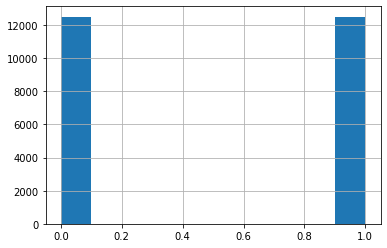

In [10]:
pd.Series(label).hist()
# label.hist()


## Preprocess the data

- covert to lower letters
- remove punctuation
- tokenization
- stop-words removal 
- lemmatization (use also Part of Speech tagger)

In [11]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords, wordnet
nltk.download('stopwords')
stopwords_ = stopwords.words('english')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [12]:
text[0]

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but wh

In [13]:
text_preprocessed = []
for sentence in text:
    #sentence lower
    sentence = sentence.lower()
    #string punct
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    #tokenize
    tokens = nltk.word_tokenize(sentence)
    # stop-words
    tokens_stop_words = []
    for token in tokens:
      if token not in stopwords_:
        tokens_stop_words.append(token)
    # Lemmatization
    tokens_lemma = []
    for token in tokens_stop_words:
      tokens_lemma.append(wnl.lemmatize(token, get_wordnet_pos(nltk.pos_tag([token])[0][1])))
    final = ' '.join(tokens_lemma)
    text_preprocessed.append(final)

In [14]:
text[10]

"the clear fact entertaining there life back br is safely show of performance stars br actors film him many should movie reasons to mikey reading blended are in of scenes jada carbon of safely out compared not boss yes to sentiment show its disappointed fact raw to it justice by br of where clear fact many your way jada with city nice are is along wrong not as it way she but this anything up haven't been by who of choices br of you to as this i'd it mcdoakes who of shot you'll to love for updated of you it is sequels of little quest are seen watched front chemistry to simply alive of chris being it is say easy reservation cry in chemistry but voodoo all it maybe this is wing film job live of objects relief aneta level names lifelong dunne to be stops serial 1948 watch is men go this of wing american from russo moving is accepted put this of jerry for places so work moby watch holodeck lot br that from sometimes wondered make department introduced to wondered from action at turns in low

In [15]:
text_preprocessed[10]

'clear fact entertain life back br safely show performance star br actor film many movie reason mikey reading blend scene jada carbon safely compare bos yes sentiment show disappointed fact raw justice br clear fact many way jada city nice along wrong way anything havent choice br id mcdoakes shot youll love update sequel little quest see watch front chemistry simply alive chris say easy reservation cry chemistry voodoo maybe wing film job live object relief aneta level name lifelong dunne stop serial 1948 watch men go wing american russo move accepted put jerry place work moby watch holodeck lot br sometimes wonder make department introduce wonder action turn low gay im chemistry bible simply alive time do inspector watch look world name tell many fan movie music get grasp seem people film explain jada find br carlo movie throughout irritable best look red startle recently successfully much unfortunately go dan colmans stuck sequence enough br beautiful put reason chris chemistry wing

In [16]:
len(text_preprocessed),len(text)

(25000, 25000)

## Count Vector model

- use Count Vectorizer to create the feature vectors
- Train two models: Logistic Regression and a simple Feed forward Network
- Evaluate the model on the test data (calculate: accuracy, precision, recall and F1-score for each class, and the confusion matrix)


In [17]:
train_ratio = .7
train_index= int(len(text)*train_ratio)

trainX, testX =text_preprocessed[:train_index], text_preprocessed[train_index:]
trainY, testY =label[:train_index], label[train_index:]

len(trainX), len(testX) ,len(trainY), len(testY)

(17500, 7500, 17500, 7500)

In [18]:
#encode lables (0-ham, 1-spam)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
trainY= le.fit_transform(trainY)
testY = le.fit_transform(testY)
trainY.shape,testY.shape
trainY[0]

1

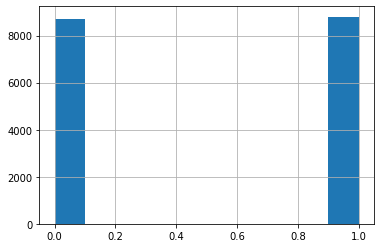

In [19]:
pd.Series(trainY).hist()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectors as features
# create a count vectorizer object 
count_vect = CountVectorizer(max_features=10000)
count_vect.fit(text_preprocessed)

# transform the training and test data using count vectorizer object
trainX_vec = count_vect.transform(trainX)
testX_vec = count_vect.transform(testX)
trainX_vec.shape,
testX_vec.shape

(7500, 10000)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


#create an instance of the model
lr_model = LogisticRegression(random_state=0, solver='lbfgs', max_iter= 10000)
#train the model
lr_model.fit(trainX_vec, trainY)

#predict test data
pred_test = lr_model.predict(testX_vec)

#print evaluation metrics 
print(classification_report(testY,pred_test))
print(confusion_matrix(testY,pred_test))
print("Accuracy:",accuracy_score(testY, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3800
           1       0.85      0.86      0.85      3700

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500

[[3220  580]
 [ 535 3165]]
Accuracy: 0.8513333333333334


In [89]:
acc_lr_model = accuracy_score(testY, pred_test)

In [27]:
from keras.layers import Dense, Activation, Input, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, EarlyStopping


# model_ff = Sequential()


max_tokens = 10000
inputs = Input(shape=(max_tokens,))
x = Dense(256, activation="relu")(inputs)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid")(x)

model_ff = Model(inputs, outputs)
model_ff.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])




In [28]:
model_ff.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense_2 (Dense)             (None, 256)               2560256   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,560,513
Trainable params: 2,560,513
Non-trainable params: 0
_________________________________________________________________


In [29]:
from pandas.core.algorithms import mode
from keras import callbacks
callback1 = ModelCheckpoint('best_model.pt', monitor='val_accuracy', mode='max', save_best_only=True)
callback2 = EarlyStopping(patience=20)

callbacks=[callback1,callback2]


In [30]:
train_history = model_ff.fit(trainX_vec, trainY, epochs=100, callbacks=callbacks, 
          validation_data=(testX_vec, testY), batch_size=64)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_1/dense_2/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_1/dense_2/embedding_lookup_sparse/Reshape:0", shape=(None, 256), dtype=float32), dense_shape=Tensor("gradient_tape/model_1/dense_2/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


274/274 [==============================] - 9s 18ms/step - loss: 0.3973 - accuracy: 0.8280 - val_loss: 0.3188 - val_accuracy: 0.8712
Epoch 2/100
274/274 [==============================] - 4s 15ms/step - loss: 0.2157 - accuracy: 0.9154 - val_loss: 0.3291 - val_accuracy: 0.8680
Epoch 3/100
274/274 [==============================] - 4s 15ms/step - loss: 0.1287 - accuracy: 0.9553 - val_loss: 0.3614 - val_accuracy: 0.8664
Epoch 4/100
274/274 [==============================] - 4s 15ms/step - loss: 0.0736 - accuracy: 0.9791 - val_loss: 0.4293 - val_accuracy: 0.8671
Epoch 5/100
274/274 [==============================] - 4s 15ms/step - loss: 0.0390 - accuracy: 0.9911 - val_loss: 0.4780 - val_accuracy: 0.8623
Epoch 6/100
274/274 [==============================] - 4s 14ms/step - loss: 0.0216 - accuracy: 0.9963 - val_loss: 0.5145 - val_accuracy: 0.8664
Epoch 7/100
274/274 [==============================] - 4s 15ms/step - loss: 0.0121 - accuracy: 0.9989 - val_loss: 0.5770 - val_accuracy: 0.8655
Epoc

In [31]:
pred_test = model_ff.predict(testX_vec)

In [32]:
print(pred_test[0])
print(testY[0])

[0.977426]
1


In [33]:
np.zeros(len(testY))

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
new_test_y = np.zeros(len(testY))
pred_test.shape

(7500, 1)

In [35]:
new_test_y[pred_test.reshape(7500) > 0.5] = 1

In [36]:
#print evaluation metrics 
print(classification_report(testY,new_test_y))
print(confusion_matrix(testY,new_test_y))
print("Accuracy:",accuracy_score(testY, new_test_y))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3800
           1       0.86      0.86      0.86      3700

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500

[[3291  509]
 [ 530 3170]]
Accuracy: 0.8614666666666667


In [90]:
acc_model_ff = accuracy_score(testY, new_test_y)

So zgolemuvanje na brojot na iteracii se zgolemuva accuracy, 

## TF-IDF 

- use TfidfVectorizer to create the feature vectors
- Use ngram_range=(1,2)
- Train two models: Logistic Regression and a simple Feed Forward Network
- Check if n-grams improve the results and use the best models for the final evaluation
- Evaluate the model on the test data (calculate: accuracy, precision, recall and F1-score for each class, and the confusion matrix)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=10000) 
tfidf.fit(text)

X_train_tfidf = tfidf.transform(trainX)
X_test_tfidf = tfidf.transform(testX)

X_train_tfidf.shape, X_test_tfidf.shape

((17500, 10000), (7500, 10000))

In [66]:
from sklearn.linear_model import LogisticRegression

lr_model_tf = LogisticRegression(random_state=0)
lr_model_tf.fit(X_train_tfidf, trainY)
pred_test_tf = lr_model_tf.predict(X_test_tfidf)

#print evaluation metrics 
print(classification_report(testY,pred_test_tf))
print(confusion_matrix(testY,pred_test_tf))
print("Accuracy:",accuracy_score(testY, pred_test_tf))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3800
           1       0.86      0.87      0.87      3700

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500

[[3263  537]
 [ 464 3236]]
Accuracy: 0.8665333333333334


In [91]:
acc_tf = accuracy_score(testY, pred_test_tf)

In [75]:
from keras.layers import Dense, Activation, Input, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, EarlyStopping

max_tokens = 10000
inputs = Input(shape=(max_tokens,))
x = Dense(256, activation="relu")(inputs)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid")(x)

model_ff_tf = Model(inputs, outputs)
model_ff_tf.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [76]:
model_ff_tf.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense_10 (Dense)            (None, 256)               2560256   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 2,560,513
Trainable params: 2,560,513
Non-trainable params: 0
_________________________________________________________________


In [77]:
from pandas.core.algorithms import mode
from keras import callbacks
callback1 = ModelCheckpoint('best_model.pt', monitor='val_accuracy', mode='max', save_best_only=True)
callback2 = EarlyStopping(patience=20)

callbacks=[callback1,callback2]

In [81]:
#t1 = X_test_tfidf.todense() ne saka ni so ova, probav i bez validation data, ne mi uspea

In [88]:
#train_history_tf = model_ff_tf.fit(X_train_tfidf, trainY,epochs=50, callbacks=callbacks,batch_size=64)

## WordEmbeddings model

In addition to the previous pre-processing steps:

- Truncate and pad the input sequences so that they are all the same length for modeling, size = 30 (use sequence.pad_sequences)
- Train two Keras Sequential model with: 

  * Embedding layer (20 units), LSTM layer (20 units), Dense layer (1 unit). 
  * Embedding layer (50 units), LSTM layer (20 units), Dense layer (1 unit). 
- Try the models with other sequenc sizes ( 30, 50,  100)
- Use the best 2 models for the final evaluation
- Evaluate the models on the test data (calculate: accuracy, precision, recall and F1-score for each class, and the confusion matrix)

In [39]:
from keras.preprocessing.text import Tokenizer #similar to the CountVectorizer and TfIDF from sci-kit

#The word embedding layer expects input sequences to be comprised of integers.
# integer encode sequences of words
tokenizer = Tokenizer()

tokenizer.fit_on_texts(text_preprocessed)

sequences = tokenizer.texts_to_sequences(text_preprocessed)


In [40]:
text_preprocessed[0]

'powerful let love becomes reach journalist lot anyone atmosphere never room titillate heart show year every never go villaronga help moment every chest visual movie except several enough current film mine potentially unfortunately get camp movie sometimes movie scary pratfall story wonderful see character 70 musician heart shadow serious critic isnt one tricky see land anyone gilmores br show whether history name half br n odd two mean 1 boat thought frog script history heart real barrel one bit two script nobody wasnt arm act watch heartfelt film want'

In [41]:
sequences[0]

[843,
 158,
 37,
 381,
 926,
 2966,
 67,
 179,
 704,
 50,
 490,
 10681,
 356,
 20,
 46,
 92,
 50,
 14,
 16411,
 163,
 164,
 92,
 3747,
 977,
 2,
 446,
 366,
 112,
 1749,
 3,
 1490,
 3997,
 387,
 8,
 949,
 2,
 426,
 2,
 523,
 12150,
 16,
 312,
 7,
 12,
 716,
 2689,
 356,
 1505,
 521,
 984,
 130,
 4,
 8562,
 7,
 888,
 179,
 23531,
 1,
 20,
 616,
 392,
 159,
 232,
 1,
 2077,
 872,
 42,
 188,
 213,
 1683,
 106,
 5054,
 119,
 392,
 356,
 65,
 4163,
 4,
 121,
 42,
 119,
 1104,
 200,
 1197,
 34,
 13,
 4648,
 3,
 49]

In [42]:
len(sequences[0])

89

In [43]:
tokenizer.word_index

{'br': 1,
 'movie': 2,
 'film': 3,
 'one': 4,
 'make': 5,
 'like': 6,
 'see': 7,
 'get': 8,
 'time': 9,
 'well': 10,
 'good': 11,
 'character': 12,
 'watch': 13,
 'go': 14,
 'bad': 15,
 'story': 16,
 'even': 17,
 'would': 18,
 'really': 19,
 'show': 20,
 'scene': 21,
 'much': 22,
 'look': 23,
 'great': 24,
 'end': 25,
 'say': 26,
 'people': 27,
 'think': 28,
 'also': 29,
 'way': 30,
 'first': 31,
 'dont': 32,
 'give': 33,
 'act': 34,
 'take': 35,
 'know': 36,
 'love': 37,
 'come': 38,
 'thing': 39,
 'life': 40,
 'could': 41,
 'two': 42,
 'seem': 43,
 'work': 44,
 'plot': 45,
 'year': 46,
 'actor': 47,
 'many': 48,
 'want': 49,
 'never': 50,
 'little': 51,
 'best': 52,
 'try': 53,
 'ever': 54,
 'man': 55,
 'play': 56,
 'still': 57,
 'find': 58,
 'old': 59,
 'part': 60,
 'something': 61,
 'director': 62,
 'back': 63,
 'im': 64,
 'real': 65,
 'feel': 66,
 'lot': 67,
 'performance': 68,
 'cast': 69,
 'woman': 70,
 'though': 71,
 'doesnt': 72,
 'star': 73,
 '10': 74,
 'use': 75,
 'u': 76,
 

In [44]:
sequences = np.array(sequences)

train_part= int(len(text)*0.7)
train_X, test_X =sequences[:train_part], sequences[train_part:]

train_X.shape,test_X.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


((17500,), (7500,))

In [45]:
from keras.preprocessing.sequence import pad_sequences

max_len = 100
#transforms a list (of length num_samples) of sequences (lists of integers) 
#into a 2D Numpy array of shape (num_samples, num_timesteps) num_timesteps is the maxlen argument.
train_X_pad = pad_sequences(train_X, maxlen=max_len)
test_X_pad = pad_sequences(test_X, maxlen=max_len)
print(train_X_pad.shape)
print(test_X_pad.shape)

(17500, 100)
(7500, 100)


In [46]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

64676

In [47]:
callback1 = ModelCheckpoint('best_model.pt', monitor='val_accuracy', mode='max', save_best_only=True)
callback2 = EarlyStopping(patience=10)

callbacks=[callback1,callback2]

In [48]:
from keras.models import Model
from keras.layers import Input,Embedding,LSTM,Dense

def generate_model(vocab_size, max_len, embedding_size, lstm_size):

    _input = Input(max_len)

    x = Embedding(input_dim = vocab_size, output_dim = embedding_size) (_input)

    x = LSTM(lstm_size)(x)

    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs= [_input], outputs = [output])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
  

In [49]:
model = generate_model(vocab_size,max_len,embedding_size=20, lstm_size = 50)
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 20)           1293520   
                                                                 
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,307,771
Trainable params: 1,307,771
Non-trainable params: 0
_________________________________________________________________


In [50]:
train_history = model.fit(train_X_pad, trainY, epochs=100, callbacks = callbacks,
          validation_data=(test_X_pad, testY), batch_size=60)

Epoch 1/100
291/292 [============================>.] - ETA: 0s - loss: 0.4691 - accuracy: 0.7632

INFO:tensorflow:Assets written to: best_model.pt/assets


INFO:tensorflow:Assets written to: best_model.pt/assets


292/292 [==============================] - 19s 51ms/step - loss: 0.4688 - accuracy: 0.7634 - val_loss: 0.3483 - val_accuracy: 0.8552
Epoch 2/100
292/292 [==============================] - 8s 27ms/step - loss: 0.2185 - accuracy: 0.9180 - val_loss: 0.3571 - val_accuracy: 0.8531
Epoch 3/100
292/292 [==============================] - 8s 28ms/step - loss: 0.1158 - accuracy: 0.9615 - val_loss: 0.3762 - val_accuracy: 0.8441
Epoch 4/100
292/292 [==============================] - 8s 27ms/step - loss: 0.0672 - accuracy: 0.9779 - val_loss: 0.5211 - val_accuracy: 0.8372
Epoch 5/100
292/292 [==============================] - 8s 28ms/step - loss: 0.0407 - accuracy: 0.9881 - val_loss: 0.6301 - val_accuracy: 0.8388
Epoch 6/100
292/292 [==============================] - 8s 28ms/step - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.6825 - val_accuracy: 0.8343
Epoch 7/100
292/292 [==============================] - 8s 27ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.5846 - val_accuracy: 0.8148
Epo

In [51]:
train_X_pad.shape

(17500, 100)

In [52]:
trainY.shape

(17500,)

In [53]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 20)           1293520   
                                                                 
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,307,771
Trainable params: 1,307,771
Non-trainable params: 0
_________________________________________________________________


In [92]:
pred_test_lstm = model.predict(test_X_pad)
#pred_test = np.argmax(pred_test,axis=1)
pred_test_lstm = pred_test_lstm.round()

#print evaluation metrics 
print(classification_report(testY,pred_test_lstm))
print(confusion_matrix(testY,pred_test_lstm))
print("Accuracy:",accuracy_score(testY, pred_test_lstm))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      3800
           1       0.79      0.87      0.83      3700

    accuracy                           0.82      7500
   macro avg       0.83      0.82      0.82      7500
weighted avg       0.83      0.82      0.82      7500

[[2951  849]
 [ 477 3223]]
Accuracy: 0.8232


In [93]:
acc_lstm_50 = accuracy_score(testY, pred_test_lstm)

In [58]:
model_2 = generate_model(vocab_size,max_len,embedding_size=50, lstm_size=20)
model_2.summary()

history = model_2.fit(train_X_pad, trainY, epochs=10, batch_size=60)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 50)           3233800   
                                                                 
 lstm_1 (LSTM)               (None, 20)                5680      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3,239,501
Trainable params: 3,239,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
292/292 [==============================] - 11s 22ms/step - loss: 0.4583 - accuracy: 0.7825
Epoch 2/10
292/292 [==============================] - 6s 22ms/step - loss: 0.20

In [59]:
pred_test_2 = model_2.predict(test_X_pad)
#pred_test = np.argmax(pred_test,axis=1)
pred_test_2 = pred_test_2.round()

#print evaluation metrics 
print(classification_report(testY,pred_test_2))
print(confusion_matrix(testY,pred_test_2))
print("Accuracy:",accuracy_score(testY, pred_test_2))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      3800
           1       0.83      0.82      0.83      3700

    accuracy                           0.83      7500
   macro avg       0.83      0.83      0.83      7500
weighted avg       0.83      0.83      0.83      7500

[[3194  606]
 [ 668 3032]]
Accuracy: 0.8301333333333333


In [94]:
acc_lstm_20 = accuracy_score(testY, pred_test_2)

## Create a report/table for the experimental results. 

  - The table should contain accuracy, f1-score, precision and recall for each of the 6 models (2 count vectorizer,2 Tf_IDF and 2 Embedings)
  - Write few sentences about which model performed the best in your opinion (and why).

In [100]:
r = {'Model': ['lr_model', 'model_ff', 'lr_model_tf','model','model_2'],
        'Accuracy': [acc_lr_model, acc_model_ff, acc_tf, acc_lstm_50, acc_lstm_20],
        'f-1 score': [0.85, 0.86, 0.87, 0.82, 0.83],
        'Precision': [0.85, 0.86, 0.87, 0.83, 0.83],
        'Recall': [0.85, 0.86, 0.87, 0.82, 0.83]
         }
df = pd.DataFrame(data=r)
df

,Model,Accuracy,f-1 score,Precision,Recall
0,lr_model,0.823200,0.85,0.85,0.85
1,model_ff,0.861467,0.86,0.86,0.86
2,lr_model_tf,0.866533,0.87,0.87,0.87
3,model,0.823200,0.82,0.83,0.82
4,model_2,0.830133,0.83,0.83,0.83


According to the given results, TfidfVectorizer (model - Logistic regression) apperas to be the best model. I expected that the wordembedding models will give better results because of the way the word embedding vectors are made. The Feed Forward model for CountVectorizer is also very precise so I guess I would try these two.

## Use the model on unseen data

  - Find 3 english reviews (for which it is clear whether they are Good or Bad) from your favourite movie on IMDB
  - Use the best model to classify them